## IMPORT LIBARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## IMPORT DATASETS

In [3]:
cleanliness = pd.read_csv('../Datasets/Updated_Cleanliness.csv')
customer_service = pd.read_csv('../Datasets/Updated_Customer_Service.csv')
facilities = pd.read_csv('../Datasets/Updated_Facilities.csv')
location = pd.read_csv('../Datasets/Updated_Location.csv')

## EDA (Exploratory Data Analysis)

In [4]:
cleanliness.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_length,review_word_count,sentiment,Topic_Perc_Contrib,Dominant_Topic,Sub_Topic
0,11914255,117276698,2016-12-05,80912513,Salma,"amazing small boutique hotel quite, comfy beds...",342,58,0.355556,0.5155,Cleanliness,Cleanliness of Rooms
1,39100832,624366965,2020-05-10,345587773,Tom,"clean modern, jing host highly recommend want...",75,11,0.185333,0.5385,Cleanliness,Cleanliness of Rooms
2,7963242,616996239908367704,2022-05-01,226830974,Ibrahim,amazing place price… couldn’t recommend better...,55,7,0.566667,0.8929,Cleanliness,Other
3,17022403,545253997,2019-10-12,286649802,Michael,room perfect lonly travellers host kind welco...,75,10,0.875000,0.8072,Cleanliness,Cleanliness of Rooms
4,819350697983787670,872184429897939962,2023-04-18,100353635,Chloe,lovely host!! amazing location!! place x,42,6,0.859375,0.8736,Cleanliness,Host's Attention to Cleanliness


In [5]:
cleanliness["Sub_Topic"].value_counts()

Sub_Topic
Other                               14984
Cleanliness of Rooms                14803
Host's Attention to Cleanliness      5614
Maintenance and Hygiene               396
Overall Cleanliness Satisfaction      264
Name: count, dtype: int64

In [6]:
customer_service["Sub_Topic"].value_counts()

Sub_Topic
Host Interaction and Support        5255
Other                               3904
Responsiveness and Communication     442
General Service Quality              438
Check-in/Check-out Process           370
Name: count, dtype: int64

In [7]:
facilities["Sub_Topic"].value_counts()

Sub_Topic
Other                          8710
Room Comfort and Amenities     5002
Cleanliness of Facilities       900
Recreational Facilities         664
General Facility Assessment      25
Name: count, dtype: int64

In [8]:
location["Sub_Topic"].value_counts()

Sub_Topic
Proximity to Key Places       20761
Other                          5773
General Location Appeal        5750
Neighborhood Quality           3356
Convenience for Travelling     2589
Name: count, dtype: int64

In [9]:
#Combine all the dataframes into one 
reviews = pd.concat([cleanliness, customer_service, facilities, location], axis=0, ignore_index=True)

In [116]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_length,review_word_count,sentiment,Topic_Perc_Contrib,Dominant_Topic,Sub_Topic
0,11914255,117276698,2016-12-05,80912513,Salma,"amazing small boutique hotel quite, comfy beds, clean simple yet stylish chic best thing hotel service staff helpful kind, willing help u anything noon perfect host make extra effort make u food u love feel home hotel 3 mins walking distance bts station, make super easy u go anywhere i'll definitely ing white ivory whenever go bangkok again",342,58,0.355556,0.5155,Cleanliness,Cleanliness of Rooms
1,39100832,624366965,2020-05-10,345587773,Tom,"clean modern, jing host highly recommend want modern condo middle bangkok",75,11,0.185333,0.5385,Cleanliness,Cleanliness of Rooms
2,7963242,616996239908367704,2022-05-01,226830974,Ibrahim,amazing place price… couldn’t recommend better honestly,55,7,0.566667,0.8929,Cleanliness,Other
3,17022403,545253997,2019-10-12,286649802,Michael,room perfect lonly travellers host kind welcoming definetely recommend it!,75,10,0.875000,0.8072,Cleanliness,Cleanliness of Rooms
4,819350697983787670,872184429897939962,2023-04-18,100353635,Chloe,lovely host!! amazing location!! place x,42,6,0.859375,0.8736,Cleanliness,Host's Attention to Cleanliness


In [10]:
# Assuming 'reviews' is your DataFrame
# Drop 10,000 rows where Sub_Topic is 'Other'
other_rows = reviews[reviews['Sub_Topic'] == 'Other']
rows_to_drop = other_rows.sample(n=20000, random_state=1) # Randomly select 10,000 rows
reviews = reviews.drop(rows_to_drop.index) # Drop the selected rows


In [11]:
reviews["Sub_Topic"].value_counts(normalize=True)

Sub_Topic
Proximity to Key Places             0.259512
Cleanliness of Rooms                0.185037
Other                               0.167137
General Location Appeal             0.071875
Host's Attention to Cleanliness     0.070175
Host Interaction and Support        0.065687
Room Comfort and Amenities          0.062525
Neighborhood Quality                0.041950
Convenience for Travelling          0.032363
Cleanliness of Facilities           0.011250
Recreational Facilities             0.008300
Responsiveness and Communication    0.005525
General Service Quality             0.005475
Maintenance and Hygiene             0.004950
Check-in/Check-out Process          0.004625
Overall Cleanliness Satisfaction    0.003300
General Facility Assessment         0.000313
Name: proportion, dtype: float64

In [12]:
#Show subtopics == other 
reviews[reviews['Sub_Topic'] == 'Other']


,listing_id,id,date,reviewer_id,reviewer_name,comments,review_length,review_word_count,sentiment,Topic_Perc_Contrib,Dominant_Topic,Sub_Topic
6,18543326,445306337,2019-04-29,220123174,Dean,place,6,1,0.000000,0.6250,Cleanliness,Other
33,566520395157706820,616989771819101311,2022-05-01,326599340,Enrico,ok place,8,2,0.500000,0.6250,Cleanliness,Other
36,30605085,656857597238816907,2022-06-25,413523787,Ahmed,choice definitely won’t go wrong location supe...,100,14,0.270833,0.4626,Cleanliness,Other
45,34863133,960525766871933824,2023-08-18,63023100,Becky,definitely worth price,22,3,0.300000,0.8125,Cleanliness,Other
49,7537579,137027330,2017-03-12,115744532,Fifi,nui best landlord ever helpful ually turn whe...,137,19,0.200000,0.4405,Cleanliness,Other
...,...,...,...,...,...,...,...,...,...,...,...,...
99948,7391651,213153785,2017-11-20,22040549,央,"pam !when arrived almost 4am ,and pam still a...",117,20,0.500000,0.6470,Location,Other
99951,28400158,734375176,2021-02-26,106444855,Naoya,mint host again thank you!,29,5,0.000000,0.4167,Location,Other
99961,32277116,568148229,2019-11-24,55207562,Wing Yin,comfortable apartment,21,2,0.400000,0.7337,Location,Other
99972,39335006,769899494802449306,2022-11-28,102387443,Marius,peacefull by city,17,3,0.000000,0.4769,Location,Other


In [13]:
#Drop rows in comments column that are empty 
reviews.dropna(subset=["comments"], inplace=True)

In [14]:
reviews["Sub_Topic"].value_counts()

#Keep only top 10 sub topics another drop 
drop_columns = ["Recreational Facilities", "Responsiveness and Communication", "General Service Quality", "Maintenance and Hygiene","Check-in/Check-out Process", "Check-in/Check-out Process","Overall Cleanliness Satisfaction","General Facility Assessment","Cleanliness of Facilities" ]

reviews = reviews[~reviews["Sub_Topic"].isin(drop_columns)]
               

/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


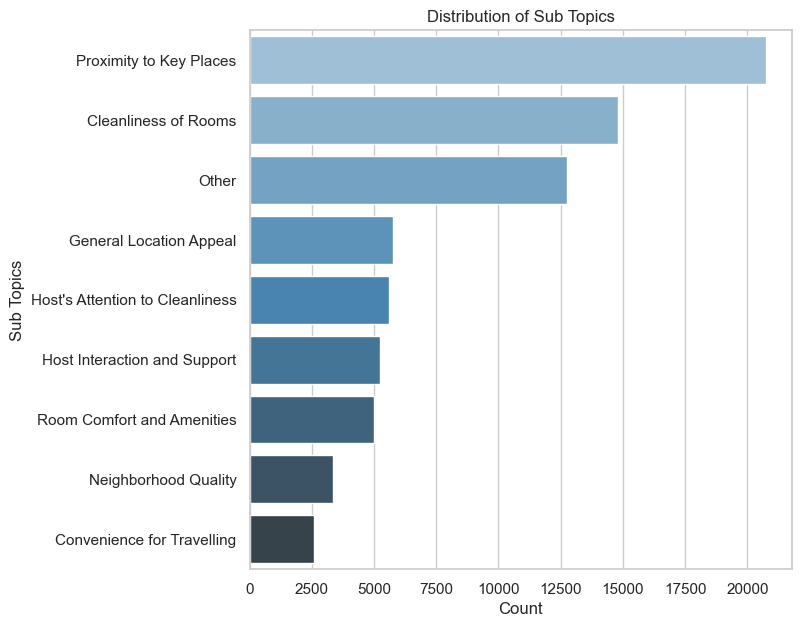

In [122]:
#Visualize the distribution of the sub topics vertical and sort them by count
plt.figure(figsize=(7,7))
sns.countplot(y="Sub_Topic", data=reviews, order=reviews["Sub_Topic"].value_counts().index, palette= "Blues_d")
plt.title("Distribution of Sub Topics")
plt.xlabel("Count")
plt.ylabel("Sub Topics")
plt.show()


/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

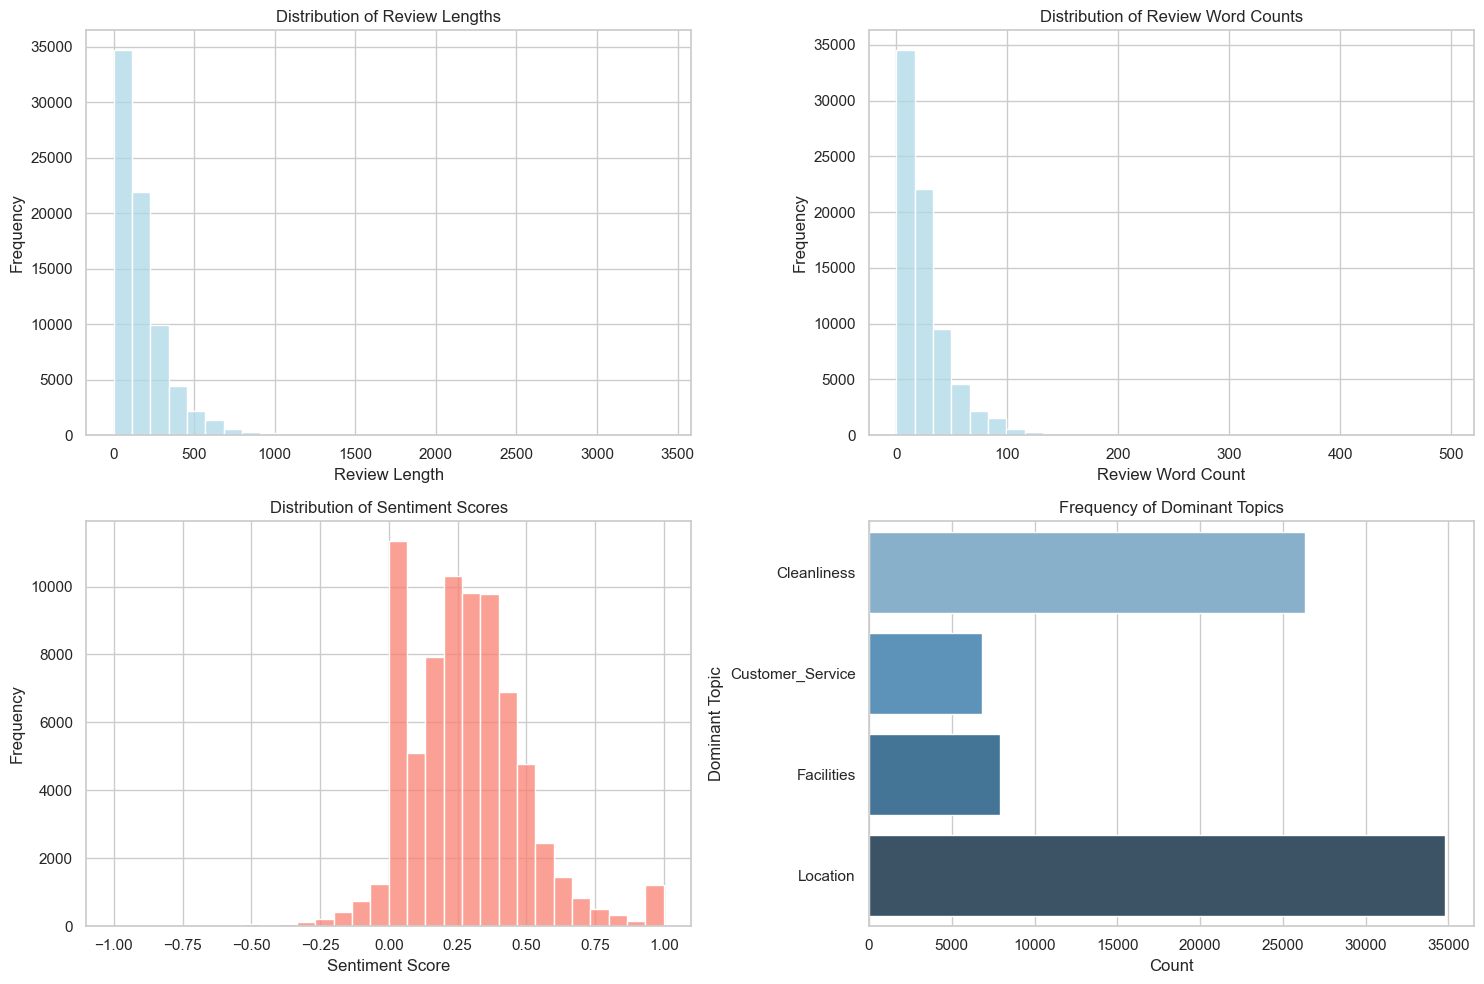

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of Review Lengths
sns.histplot(reviews['review_length'], bins=30, ax=axes[0, 0], color='lightblue')
axes[0, 0].set_title('Distribution of Review Lengths')
axes[0, 0].set_xlabel('Review Length')
axes[0, 0].set_ylabel('Frequency')

# Distribution of Review Word Counts
sns.histplot(reviews['review_word_count'], bins=30, ax=axes[0, 1], color='lightblue')
axes[0, 1].set_title('Distribution of Review Word Counts')
axes[0, 1].set_xlabel('Review Word Count')
axes[0, 1].set_ylabel('Frequency')

# Distribution of Sentiment Scores
sns.histplot(reviews['sentiment'], bins=30, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Distribution of Sentiment Scores')
axes[1, 0].set_xlabel('Sentiment Score')
axes[1, 0].set_ylabel('Frequency')

# Frequency of Dominant Topics
sns.countplot(y='Dominant_Topic', data=reviews, ax=axes[1, 1], palette="Blues_d")
axes[1, 1].set_title('Frequency of Dominant Topics')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Dominant Topic')

plt.tight_layout()
plt.show()


/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

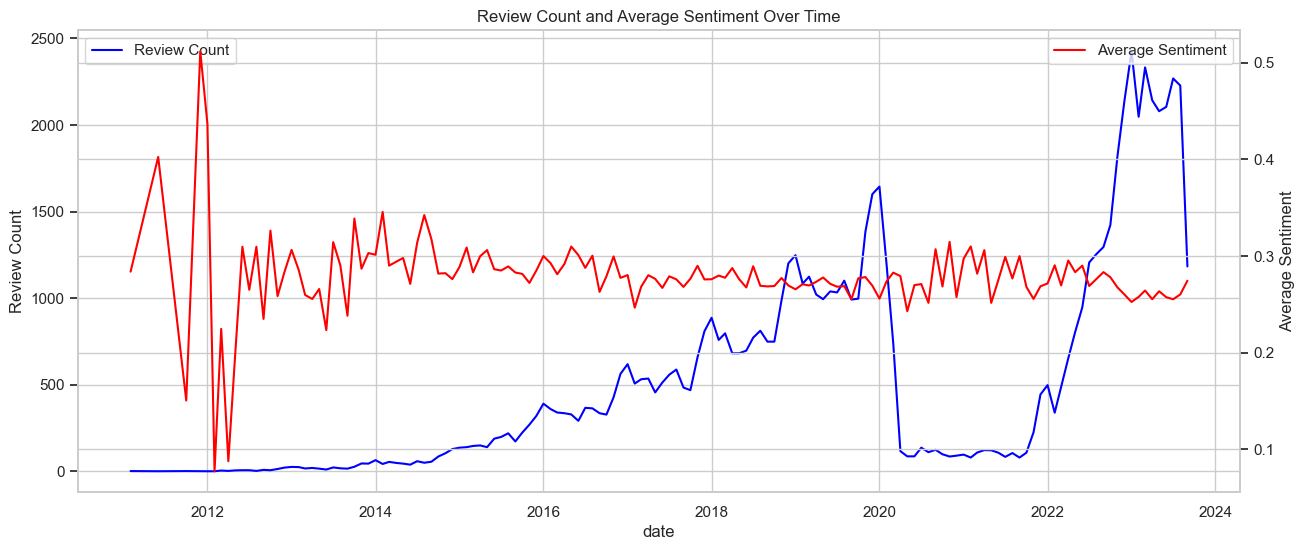

In [16]:
# Converting the 'date' column to datetime for time series analysis
reviews['date'] = pd.to_datetime(reviews['date'])

# Creating a dataframe for time series analysis
time_series_data = reviews.groupby(reviews['date'].dt.to_period("M")).agg({'id': 'count', 'sentiment': 'mean'}).rename(columns={'id': 'Review Count', 'sentiment': 'Average Sentiment'})

# Resetting the index to convert the date from Period to DateTime
time_series_data = time_series_data.reset_index()
time_series_data['date'] = time_series_data['date'].dt.to_timestamp()

# Plotting the time series data
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='Review Count', data=time_series_data, label='Review Count', color='blue')
ax2 = plt.gca().twinx()
sns.lineplot(x='date', y='Average Sentiment', data=time_series_data, ax=ax2, label='Average Sentiment', color='red')

plt.title('Review Count and Average Sentiment Over Time')
plt.show()


/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


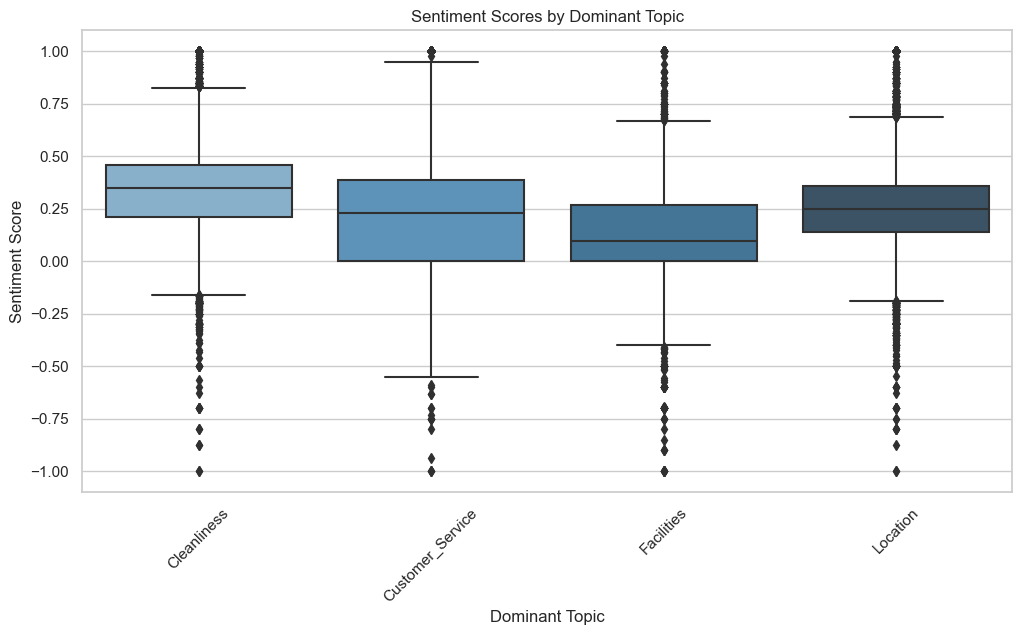

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dominant_Topic', y='sentiment', data=reviews, palette="Blues_d")
plt.xticks(rotation=45)
plt.title('Sentiment Scores by Dominant Topic')
plt.xlabel('Dominant Topic')
plt.ylabel('Sentiment Score')
plt.show()


/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

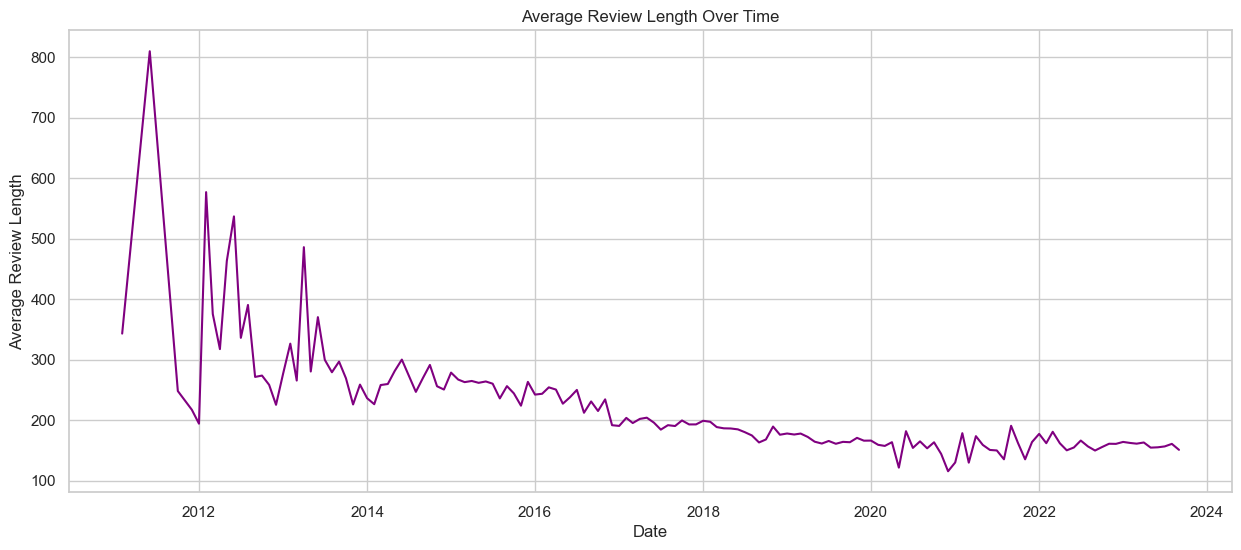

In [18]:
# Creating a dataframe for average review length over time
avg_length_time_series = reviews.groupby(reviews['date'].dt.to_period("M"))['review_length'].mean()

# Resetting the index
avg_length_time_series = avg_length_time_series.reset_index()
avg_length_time_series['date'] = avg_length_time_series['date'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='review_length', data=avg_length_time_series, color='purple')
plt.title('Average Review Length Over Time')
plt.xlabel('Date')
plt.ylabel('Average Review Length')
plt.show()


/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


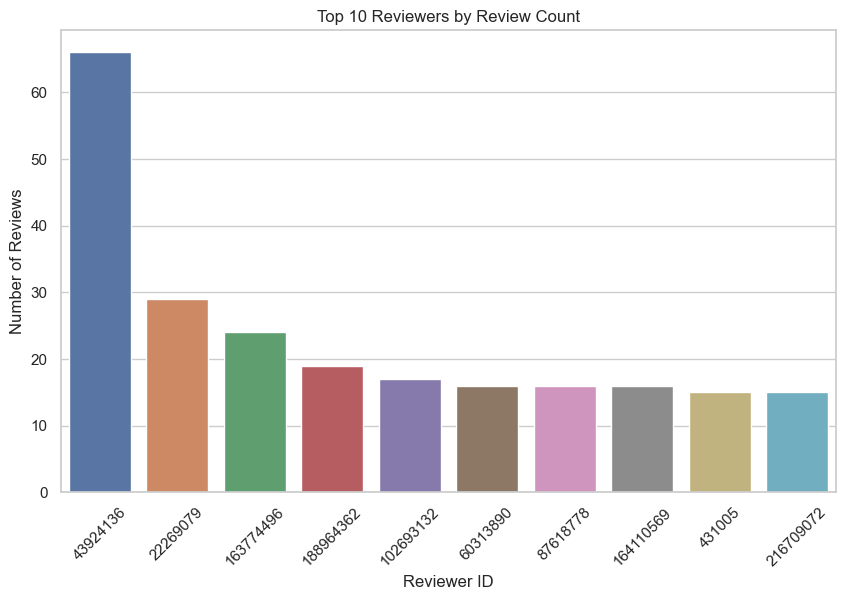

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='reviewer_id', data=reviews, order = reviews['reviewer_id'].value_counts().iloc[:10].index)
plt.title('Top 10 Reviewers by Review Count')
plt.xlabel('Reviewer ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


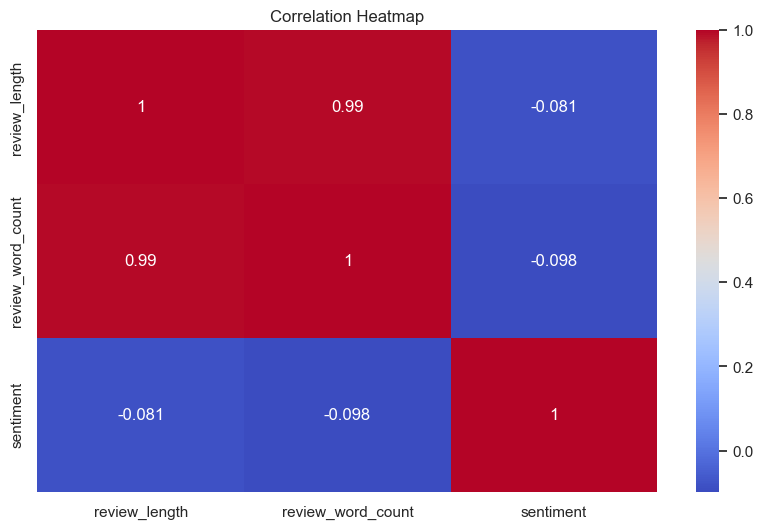

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(reviews[['review_length', 'review_word_count', 'sentiment']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


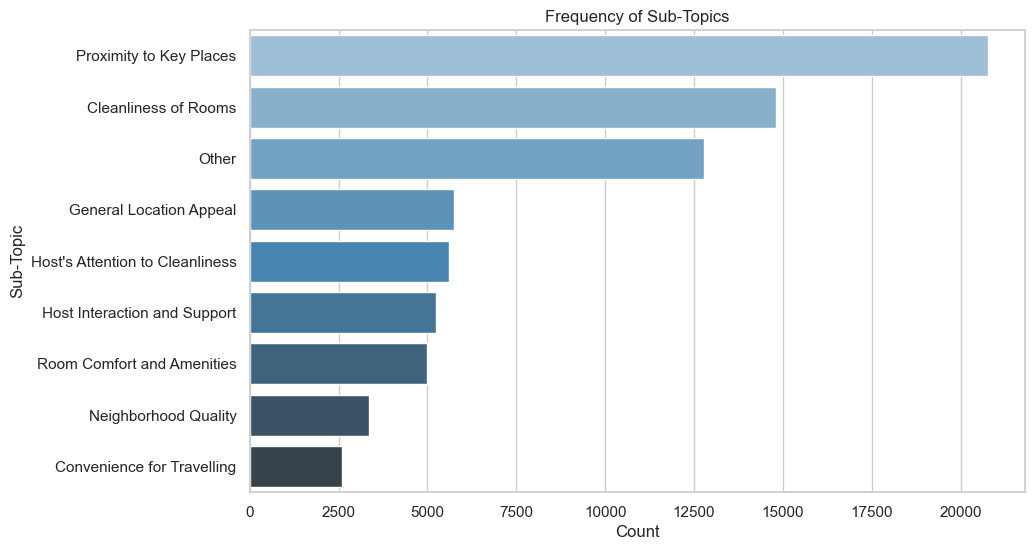

In [21]:
plt.figure(figsize=(10, 6))
sub_topic_counts = reviews['Sub_Topic'].value_counts()
sns.barplot(y=sub_topic_counts.index, x=sub_topic_counts.values, palette="Blues_d")
plt.title('Frequency of Sub-Topics')
plt.xlabel('Count')
plt.ylabel('Sub-Topic')

plt.show()


/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


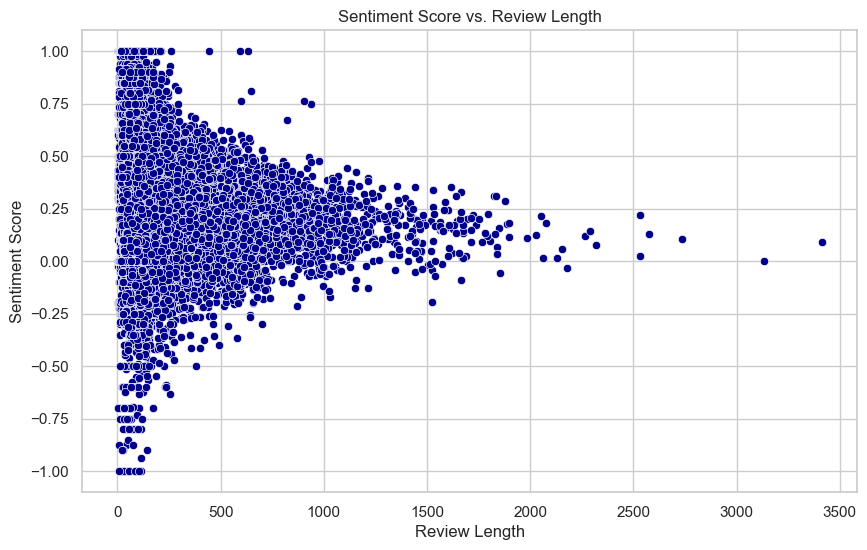

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='sentiment', data=reviews, color="darkblue")
plt.title('Sentiment Score vs. Review Length')
plt.xlabel('Review Length')
plt.ylabel('Sentiment Score')
plt.show()


/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


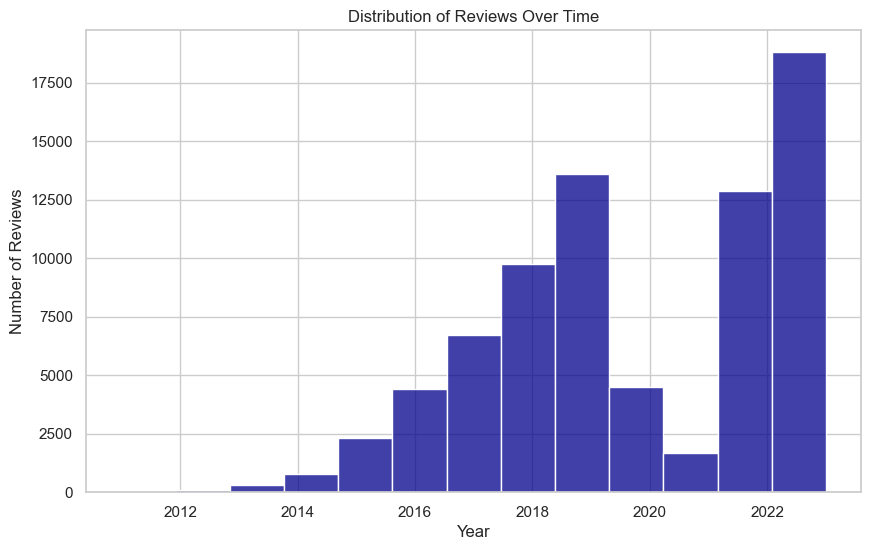

In [23]:
reviews['year'] = reviews['date'].dt.year
plt.figure(figsize=(10, 6))
sns.histplot(reviews['year'], bins=reviews['year'].nunique(), color="darkblue")
plt.title('Distribution of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()


In [24]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('punkt')       
nltk.download('stopwords')  
nltk.download('wordnet')    

# Function to clean and preprocess text data
def clean_text(text):
    # Remove non-alphabetic characters and convert text to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A).lower()

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stopwords (common words that may not contribute much meaning)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens (reduce them to their root form)
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Return the preprocessed text as a string
    return ' '.join(lemmatized_text)

# Apply the clean_text function to each comment in the 'comments' column
reviews['cleaned_comments'] = reviews['comments'].apply(clean_text)


[nltk_data] Downloading package punkt to /Users/aadisak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aadisak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/aadisak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## MODELING

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer with a maximum of 1000 features
# This vectorizer will convert the text data into a matrix of TF-IDF features
tfidf = TfidfVectorizer(max_features=20000)

# Apply the TF-IDF Vectorizer to the 'cleaned_comments' column
# This step converts the text data into a format suitable for machine learning models
tfidf_matrix = tfidf.fit_transform(reviews['cleaned_comments'])


In [27]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

# Split the dataset
X = tfidf_matrix
y = reviews['Sub_Topic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)



/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

{'C': 10, 'penalty': 'l2'}
                                 precision    recall  f1-score   support

           Cleanliness of Rooms       0.85      0.83      0.84      2961
     Convenience for Travelling       0.83      0.64      0.72       518
        General Location Appeal       0.69      0.67      0.68      1150
   Host Interaction and Support       0.79      0.76      0.77      1051
Host's Attention to Cleanliness       0.84      0.83      0.83      1123
           Neighborhood Quality       0.82      0.74      0.78       671
                          Other       0.71      0.78      0.74      2555
        Proximity to Key Places       0.90      0.92      0.91      4152
     Room Comfort and Amenities       0.77      0.75      0.76      1000

                       accuracy                           0.81     15181
                      macro avg       0.80      0.77      0.78     15181
                   weighted avg       0.81      0.81      0.81     15181



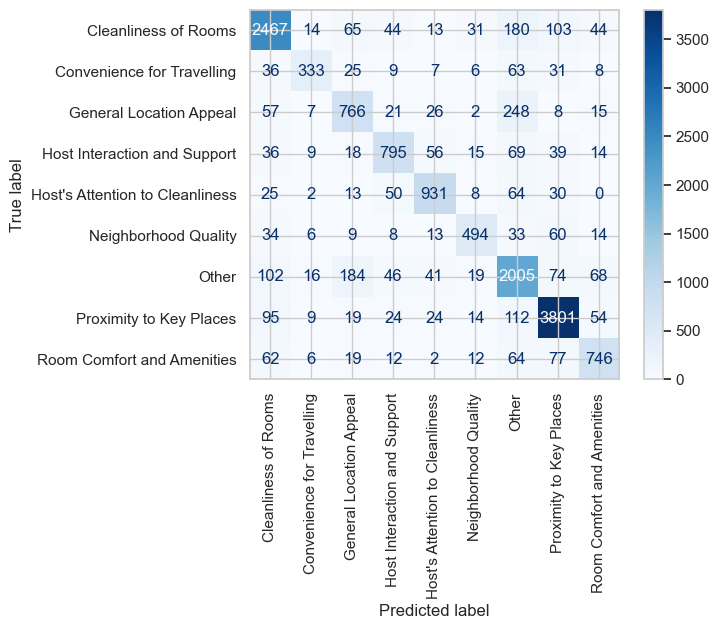

In [28]:
#use logistic regression to find the best parameters 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
#import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay


# Create the parameter grid based on the results of random search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create a based model
logistic_regression = LogisticRegression(max_iter=1000)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = logistic_regression, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

#evaluate the model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = grid_search.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

#Confusion Matrix display
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot(cmap='Blues', values_format='d', xticks_rotation='vertical')
plt.show()


In [29]:
#SMOTE  to balance the data
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Create the SMOTE object
smote = SMOTE()

# Fit the training data to the SMOTE object
X_train, y_train = smote.fit_resample(X_train, y_train)

In [30]:
#Find a mispredict sentence and show how comment looks like

result_df = pd.DataFrame({'true':y_test, 'pred':y_pred})
missprediction = result_df[result_df['true']!=result_df['pred']]
missprediction.head(20)

#show all text 
pd.set_option('display.max_colwidth', None)
#Show the mispredict comment 20 
missprediction['comment'] = reviews['comments']
missprediction.tail(150)



/var/folders/tr/y6nybfjj6xxgwrmyj_nbfb5w0000gn/T/ipykernel_50268/2420744244.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missprediction['comment'] = reviews['comments']


,true,pred,comment
77943,Proximity to Key Places,Room Comfort and Amenities,"check-in smooth easy, staff ready arrived staff support prompt whenever needed it apt level 2 3, units big, spacio living soade daily necessities included importantly kept, clean neat like near train station group tried spa services (thai massage, hot essential oil massage, head & foot massage), agreed enjoyable quality service, price range affordable compared massage packages shopping malls eakfast cafe, food delicio photos worthy daily activities guests participate location (painting, tie dye, phone case masking, movie night, yoga, etc), unfortunately, travel schedule planned packed coming here, check friendly staff activities available join fun definitely come back here"
77847,General Location Appeal,Other,"location, communication enjoyed thanks lot!"
81343,General Location Appeal,Other,simple comfy place excellent roof top pool
98117,Proximity to Key Places,Host Interaction and Support,"super chic stylish space! alice hosts communicating location , literally next mtr walk underground bts hosts gave list recommendations pool course"
95449,Proximity to Key Places,Room Comfort and Amenities,"place comfortable description, initially expecting private room, thought living room kitchen may shared however, pleasantly surprised find actually whole private apartment, including living room kitchen place clean, beautiful, convenient bed comfortable, living room kitchen overall equipped washing machine, detergent softener provided kitchen necessary kitchenware, microwave, electric pot host provides water, coffee happy location near big shopping centers, including paradise park paradise park favorite place bangkok buy food, variety generally cheap delicio instance, two stalls excellent vegetarian food food court"
...,...,...,...
72521,General Location Appeal,Other,boyfriend ed evan's guestroom 3 nights get important information room location booked helpull informations handover key come back everytime evan's location :)
12671,Cleanliness of Rooms,Neighborhood Quality,"outstanding views living room bed room you’re looking comfortable condo perfect city river views, place you far morning market local food building security helpful staffs recommend anyone"
87898,Neighborhood Quality,Other,two friends ed kanomping's apartment last night bangkok flying back united states apartment worked perfectly especially appreciated snacks water getting flight chang mai i'd definitely recommend apartment anyone looking place ari neighborhood!
1357,Cleanliness of Rooms,Room Comfort and Amenities,room small basic value price room super-clean! area ing bts okey 15 min walk many farangs arround


In [31]:
#See Predic probabilities
y_pred_proba = grid_search.predict_proba(X_test)

#in DataFrame
y_pred_proba_df = pd.DataFrame(y_pred_proba)
y_pred_proba_df.head()


#label names of the columns 
y_pred_proba_df.columns = grid_search.classes_
y_pred_proba_df.head()

#round the probabilities to 2 decimal places
y_pred_proba_df = y_pred_proba_df.round(5)
y_pred_proba_df.head(20)

,Cleanliness of Rooms,Convenience for Travelling,General Location Appeal,Host Interaction and Support,Host's Attention to Cleanliness,Neighborhood Quality,Other,Proximity to Key Places,Room Comfort and Amenities
0,0.93865,0.00006,0.00057,0.00020,0.00021,0.00002,0.06020,0.00001,0.00009
1,0.01949,0.00023,0.00609,0.00005,0.00172,0.06874,0.00646,0.89709,0.00013
2,0.05598,0.23241,0.00033,0.00216,0.20309,0.00299,0.00317,0.49882,0.00105
3,0.00000,0.00000,0.00000,0.97761,0.02239,0.00000,0.00000,0.00000,0.00000
4,0.99782,0.00001,0.00000,0.00006,0.00013,0.00034,0.00018,0.00116,0.00030
5,0.00000,0.00525,0.00011,0.00000,0.00000,0.00033,0.00022,0.99402,0.00007
6,0.00362,0.00552,0.00048,0.00002,0.00011,0.00029,0.00002,0.98987,0.00008
7,0.00029,0.00139,0.05828,0.89188,0.00039,0.00268,0.03475,0.01005,0.00030
8,0.01423,0.00000,0.00000,0.98262,0.00000,0.00000,0.00000,0.00315,0.00000
9,0.00041,0.00021,0.00213,0.00067,0.00039,0.00014,0.99509,0.00014,0.00081


In [32]:
# Get prediction probabilities
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pred_proba = pd.DataFrame(grid_search.predict_proba(X_test), columns=grid_search.classes_)
pred_proba.head()

,Cleanliness of Rooms,Convenience for Travelling,General Location Appeal,Host Interaction and Support,Host's Attention to Cleanliness,Neighborhood Quality,Other,Proximity to Key Places,Room Comfort and Amenities
0,0.003283,3.604241e-06,2.985113e-05,7.421762e-04,5.098820e-03,2.347003e-07,0.008951,9.818840e-01,6.911518e-06
1,0.826429,1.363607e-03,9.244050e-02,1.564224e-07,4.595433e-03,1.285396e-04,0.073626,1.416028e-03,6.262212e-07
2,0.997683,1.331818e-07,4.749185e-07,8.932417e-09,1.105785e-13,3.983037e-08,0.000001,8.718037e-08,2.315142e-03
3,0.000032,2.635307e-06,1.302727e-09,3.799066e-03,9.171490e-04,2.893994e-06,0.000003,9.952419e-01,9.506659e-07
4,0.000661,1.914148e-05,4.564070e-06,8.760556e-06,6.811169e-07,2.811212e-06,0.000019,9.983283e-01,9.554274e-04


In [33]:
# Get the model accuracy
accuracy = accuracy_score(y_test, y_pred)

## TAG SUGGESTION

In [34]:
# Generate prediction with custom function, using threshold to be able to suggest multiple tags
def tag_suggestion(pred_proba, threshold, suggest_tags_num):
    predictions = []
    for row_num in pred_proba.index:
        row_proba = pred_proba.iloc[row_num].sort_values(ascending=False)

        # If max of prediction probability >= model performance 
        if max(row_proba) >= (threshold ):
            row_suggestion = list(row_proba.index[:1])
        else:
            row_suggestion = list(row_proba.index[:suggest_tags_num])

        predictions.append(row_suggestion)

    return predictions



In [35]:
# Define a threshold value (adjust as needed)
threshold_value = 0.7  # Example threshold

# Call the tag_suggestion function with the numerical threshold
predictions = tag_suggestion(pred_proba, threshold=threshold_value, suggest_tags_num=2)
predictions[:10]



[['Proximity to Key Places'],
 ['Cleanliness of Rooms'],
 ['Cleanliness of Rooms'],
 ['Proximity to Key Places'],
 ['Proximity to Key Places'],
 ['Host Interaction and Support'],
 ['Neighborhood Quality'],
 ['Proximity to Key Places'],
 ["Host's Attention to Cleanliness"],
 ['Room Comfort and Amenities']]

In [36]:
# Compare with actual
for i in range(len(y_test)):
    print('Actual:', list(y_test)[i], '--- Suggest:', predictions[i])

Actual: Proximity to Key Places --- Suggest: ['Proximity to Key Places']
Actual: Cleanliness of Rooms --- Suggest: ['Cleanliness of Rooms']
Actual: Cleanliness of Rooms --- Suggest: ['Cleanliness of Rooms']
Actual: Proximity to Key Places --- Suggest: ['Proximity to Key Places']
Actual: Proximity to Key Places --- Suggest: ['Proximity to Key Places']
Actual: Host Interaction and Support --- Suggest: ['Host Interaction and Support']
Actual: Neighborhood Quality --- Suggest: ['Neighborhood Quality']
Actual: Proximity to Key Places --- Suggest: ['Proximity to Key Places']
Actual: Host's Attention to Cleanliness --- Suggest: ["Host's Attention to Cleanliness"]
Actual: Room Comfort and Amenities --- Suggest: ['Room Comfort and Amenities']
Actual: Cleanliness of Rooms --- Suggest: ['Cleanliness of Rooms']
Actual: Proximity to Key Places --- Suggest: ['Proximity to Key Places']
Actual: Proximity to Key Places --- Suggest: ['Proximity to Key Places']
Actual: Cleanliness of Rooms --- Suggest: [

In [37]:
# Percentage of relevant suggestion
np.mean([list(y_test)[i] in predictions[i] for i in range(len(y_test))])

0.9628482972136223

### If we do threshold 0.7 and if lower than 0.7 we do 2 tags accuracore is 0.96 